In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load and explore file
file = pd.read_csv("sentiments.csv")
file.head()

,Timestamp,What type of data interests you the most?
0,9/26/2022 21:20,"Financial, Sociological, Consumer Behavior, So..."
1,9/26/2022 21:20,"Financial, Consumer Behavior"
2,9/26/2022 21:20,"Educational, Psychological, Consumer Behavior,..."
3,9/26/2022 21:20,"Healthcare, Financial, Consumer Behavior"
4,9/26/2022 21:20,"Healthcare, Financial, Educational, Consumer B..."


In [3]:
# data can't be analyzed yet, let's transform it
file.describe()

,Timestamp,What type of data interests you the most?
count,17,17
unique,4,16
top,9/26/2022 21:21,"Healthcare, Financial, Educational, Consumer B..."
freq,9,2


In [4]:
# rename columns
file.columns = ["timestamp", "interests"]
file.head()

,timestamp,interests
0,9/26/2022 21:20,"Financial, Sociological, Consumer Behavior, So..."
1,9/26/2022 21:20,"Financial, Consumer Behavior"
2,9/26/2022 21:20,"Educational, Psychological, Consumer Behavior,..."
3,9/26/2022 21:20,"Healthcare, Financial, Consumer Behavior"
4,9/26/2022 21:20,"Healthcare, Financial, Educational, Consumer B..."


In [5]:
# create "dummy" variables
dfile = file.copy()
dfile = dfile.join(dfile.pop('interests').str.get_dummies(', '))
dfile.head()

,timestamp,Consumer Behavior,Educational,Entertainment/E-commerce,Financial,Healthcare,Meteorological,Mostly,Psychological,Social Media,Sociological,Transportation/Logistics field,music and entertainment
0,9/26/2022 21:20,1,0,0,1,0,0,0,0,1,1,0,0
1,9/26/2022 21:20,1,0,0,1,0,0,0,0,0,0,0,0
2,9/26/2022 21:20,1,1,0,0,0,0,0,1,1,0,0,0
3,9/26/2022 21:20,1,0,0,1,1,0,0,0,0,0,0,0
4,9/26/2022 21:20,1,1,0,1,1,0,0,0,1,0,0,0


In [6]:
# remove timestamp
dfile = dfile.drop(axis=1, labels="timestamp")
dfile.head()

,Consumer Behavior,Educational,Entertainment/E-commerce,Financial,Healthcare,Meteorological,Mostly,Psychological,Social Media,Sociological,Transportation/Logistics field,music and entertainment
0,1,0,0,1,0,0,0,0,1,1,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,1,0,0,0
3,1,0,0,1,1,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,1,0,0,0


In [7]:
# lets do some visualizations!
# corr heatmap
correlate = dfile.corr()
correlate

,Consumer Behavior,Educational,Entertainment/E-commerce,Financial,Healthcare,Meteorological,Mostly,Psychological,Social Media,Sociological,Transportation/Logistics field,music and entertainment
Consumer Behavior,1.000000,0.203091,-0.338502,0.632627,0.117698,-0.112367,0.184637,0.117698,0.696311,-0.132410,-0.338502,0.184637
Educational,0.203091,1.000000,-0.235702,-0.169031,0.169031,0.021517,-0.235702,0.169031,0.291667,-0.070430,-0.235702,-0.235702
Entertainment/E-commerce,-0.338502,-0.235702,1.000000,0.209165,0.298807,0.684653,-0.062500,0.298807,-0.235702,0.298807,-0.062500,-0.062500
Financial,0.632627,-0.169031,0.209165,1.000000,0.457143,0.305505,0.209165,-0.028571,0.309890,-0.028571,-0.298807,0.209165
Healthcare,0.117698,0.169031,0.298807,0.457143,1.000000,0.436436,-0.209165,-0.214286,-0.070430,-0.214286,-0.209165,-0.209165
Meteorological,-0.112367,0.021517,0.684653,0.305505,0.436436,1.000000,-0.091287,0.436436,0.021517,0.436436,-0.091287,-0.091287
Mostly,0.184637,-0.235702,-0.062500,0.209165,-0.209165,-0.091287,1.000000,0.298807,0.265165,-0.209165,-0.062500,1.000000
Psychological,0.117698,0.169031,0.298807,-0.028571,-0.214286,0.436436,0.298807,1.000000,0.408491,0.514286,-0.209165,0.298807
Social Media,0.696311,0.291667,-0.235702,0.309890,-0.070430,0.021517,0.265165,0.408491,1.000000,0.169031,-0.235702,0.265165
Sociological,-0.132410,-0.070430,0.298807,-0.028571,-0.214286,0.436436,-0.209165,0.514286,0.169031,1.000000,-0.209165,-0.209165


<AxesSubplot:>

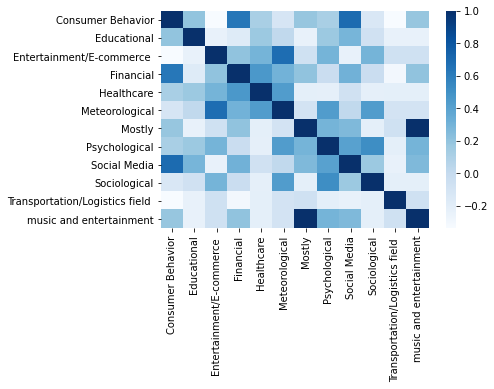

In [8]:
sns.heatmap(correlate,cmap= 'Blues')

In [9]:
# get count of interests
count = dfile.sum(axis = 0, skipna = True).sort_values(ascending=False)
count

Consumer Behavior                  11
Financial                          10
Social Media                        8
Educational                         8
Sociological                        7
Psychological                       7
Healthcare                          7
Meteorological                      2
music and entertainment             1
Transportation/Logistics field      1
Mostly                              1
Entertainment/E-commerce            1
dtype: int64

<AxesSubplot:>

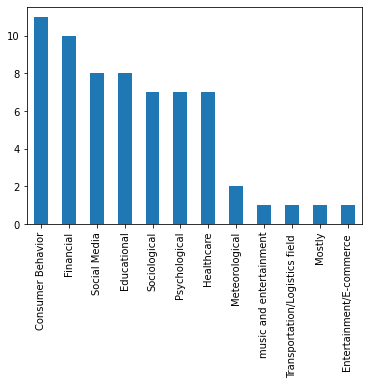

In [10]:
# plot with bar graph
count.plot(kind="bar")